Informações do Dataset de Treinamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  obj

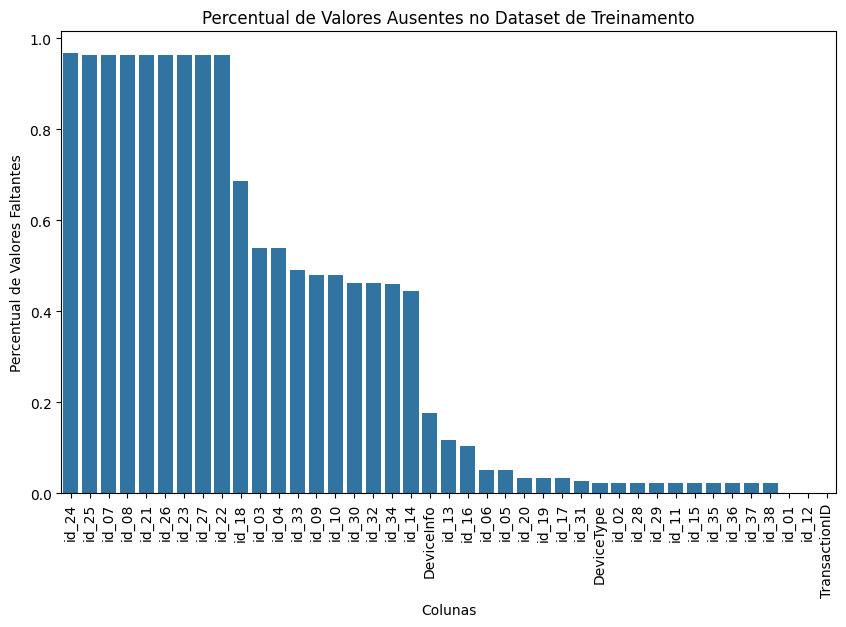

In [5]:
# Bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Carregar os dados
# Faça o upload dos arquivos train_identity.csv, test_identity.csv, e sample_submission.csv no Google Colab
# Em seguida, carregue-os da seguinte forma:
train_identity = pd.read_csv('/content/train_identity.csv')

# 2. Análise Exploratória dos Dados (EDA)
# Checar informações básicas
print("Informações do Dataset de Treinamento:")
print(train_identity.info())

# Visualizando o percentual de valores ausentes
missing_data = train_identity.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.title("Percentual de Valores Ausentes no Dataset de Treinamento")
plt.ylabel("Percentual de Valores Faltantes")
plt.xlabel("Colunas")
plt.show()



In [8]:
# 3. Preparar os dados para o modelo LSTM
# Selecionar apenas as colunas numéricas (ignorando as colunas que têm strings ou categorias)
numerical_columns = train_identity.select_dtypes(include=[np.number]).columns.tolist()

# Tratar valores ausentes preenchendo com a mediana apenas em colunas numéricas
train_identity_filled = train_identity[numerical_columns].fillna(train_identity[numerical_columns].median())

# Normalizar os dados para o LSTM
scaler = MinMaxScaler()
train_identity_scaled = scaler.fit_transform(train_identity_filled)

# Função para criar sequências de dados para LSTM
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
    return np.array(sequences)

# Definindo o tamanho da sequência
sequence_length = 10

# Criando as sequências de dados
sequences = create_sequences(train_identity_scaled, sequence_length)

# Simulando uma variável alvo para treinamento (suponha que estamos prevendo uma coluna 'isFraud')
# Substitua essa coluna pelo alvo real do dataset
target = np.random.randint(0, 2, len(sequences))  # Isso é apenas um placeholder, substitua pelo dado real

# 4. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          22,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,233 (137.63 KB)

 Trainable params: 35,233 (137.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.4988 - loss: 0.6942 - val_accuracy: 0.4986 - val_loss: 0.6933
Epoch 2/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.4969 - loss: 0.6933 - val_accuracy: 0.4986 - val_loss: 0.6936
Epoch 3/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.4971 - loss: 0.6933 - val_accuracy: 0.4986 - val_loss: 0.6933
Epoch 4/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6931
Epoch 5/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6931
Epoch 6/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6931
Epoch 7/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6931
Epoch 8/10
3606/3606 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.4983 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


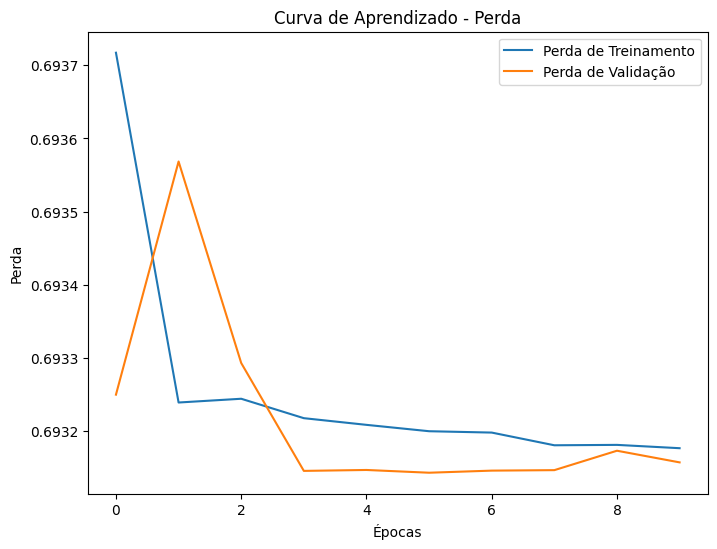

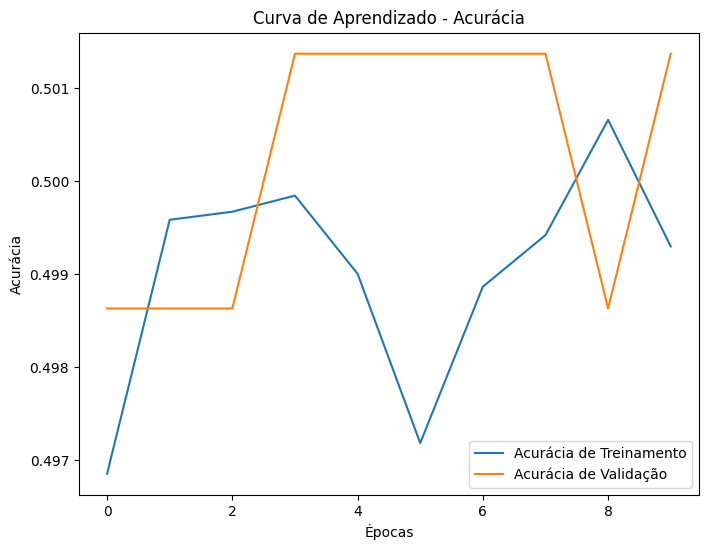

In [9]:
# 5. Definir a arquitetura do modelo LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar a arquitetura do modelo
model.summary()

# 6. Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 7. Avaliar o desempenho do modelo
# Previsões
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Converter para 0 ou 1

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc}")

# 8. Plotar a curva de aprendizado
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title("Curva de Aprendizado - Perda")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()

# 9. Plotar a Acurácia durante o Treinamento
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title("Curva de Aprendizado - Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()
